## 구글 드라이브 마운트

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/BigContest')

MessageError: Error: credential propagation was unsuccessful

## 라이브러리

In [ ]:
pip install lunardate

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.utils.class_weight import compute_sample_weight

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from sklearn.tree import export_text

from sklearn.inspection import PartialDependenceDisplay


In [ ]:
pip install pycaret

In [ ]:
from pycaret.classification import *

## 데이터 불러오기

In [ ]:
data = pd.read_csv('data/final_model_data.csv').drop(columns = 'Unnamed: 0')
data

NameError: name 'pd' is not defined

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3940993 entries, 0 to 3940992
Data columns (total 25 columns):
 #   Column               Dtype  
---  ------               -----  
 0   origin               object 
 1   dest                 object 
 2   date                 int64  
 3   start_time           int64  
 4   end_time             int64  
 5   gender               int64  
 6   age                  int64  
 7   modal                int64  
 8   origin_purpose       float64
 9   dest_purpose         int64  
 10  od_dist_avg          float64
 11  od_duration_avg      float64
 12  max_time             float64
 13  min_time             float64
 14  num_transit_methods  float64
 15  median_time          float64
 16  predict_time         float64
 17  max_distance         float64
 18  median_distance      float64
 19  max_transit_methods  float64
 20  num_transfer         float64
 21  median_last_walk     float64
 22  avg_last_walk        float64
 23  isFestival           bool   
 24

In [ ]:
data = data[data.modal != 0]
data

,origin,dest,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,...,median_time,predict_time,max_distance,median_distance,max_transit_methods,num_transfer,median_last_walk,avg_last_walk,isFestival,isWeekend
48,S,D,20230902,10,14,0,0,5,0.0,5,...,9568.0,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,False,True
49,S,D,20230902,10,14,0,0,5,0.0,5,...,9568.0,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,False,True
50,S,D,20230902,10,14,0,0,5,0.0,5,...,9568.0,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,False,True
51,S,D,20230902,10,14,0,0,5,0.0,5,...,9568.0,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,False,True
52,S,D,20230902,10,14,0,0,5,0.0,5,...,9568.0,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3940953,G,GB,20231015,12,13,1,3,4,5.0,5,...,2155.0,223.325581,31749.0,7296.0,2.0,3.037209,3.10,4.083333,True,True
3940954,G,GB,20231015,12,13,1,3,4,5.0,5,...,2155.0,223.325581,31749.0,7296.0,2.0,3.037209,3.10,4.083333,True,True
3940955,G,GB,20231015,12,13,1,3,4,5.0,5,...,2155.0,223.325581,31749.0,7296.0,2.0,3.037209,3.10,4.083333,True,True
3940956,G,GB,20231015,12,13,1,3,4,5.0,5,...,2155.0,223.325581,31749.0,7296.0,2.0,3.037209,3.10,4.083333,True,True


In [ ]:
data = data.drop_duplicates()
data

,origin,dest,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,...,median_time,predict_time,max_distance,median_distance,max_transit_methods,num_transfer,median_last_walk,avg_last_walk,isFestival,isWeekend
48,S,D,20230902,10,14,0,0,5,0.0,5,...,9568.0,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,False,True
111,S,D,20230902,9,12,0,0,5,0.0,5,...,9568.0,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,False,True
1021,S,D,20231006,13,17,1,0,5,0.0,5,...,9568.0,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,False,False
1042,S,D,20231006,15,17,0,0,5,0.0,5,...,9568.0,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,False,False
1352,S,D,20231013,17,21,1,0,5,5.0,4,...,9568.0,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3940868,G,GB,20231015,9,10,1,2,1,5.0,5,...,2155.0,223.325581,31749.0,7296.0,2.0,3.037209,3.10,4.083333,True,True
3940883,G,GB,20231015,19,20,1,2,1,5.0,5,...,2155.0,223.325581,31749.0,7296.0,2.0,3.037209,3.10,4.083333,True,True
3940913,G,GB,20231015,10,11,1,4,1,5.0,5,...,2155.0,223.325581,31749.0,7296.0,2.0,3.037209,3.10,4.083333,True,True
3940948,G,GB,20231015,20,20,1,4,1,4.0,0,...,2155.0,223.325581,31749.0,7296.0,2.0,3.037209,3.10,4.083333,True,True


## 결측치 확인

In [ ]:
data.isna().sum()

,0
origin,0
dest,0
date,0
start_time,0
end_time,0
gender,0
age,0
modal,0
origin_purpose,0
dest_purpose,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145683 entries, 48 to 3940953
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   origin               145683 non-null  object 
 1   dest                 145683 non-null  object 
 2   date                 145683 non-null  int64  
 3   start_time           145683 non-null  int64  
 4   end_time             145683 non-null  int64  
 5   gender               145683 non-null  int64  
 6   age                  145683 non-null  int64  
 7   modal                145683 non-null  int64  
 8   origin_purpose       145683 non-null  float64
 9   dest_purpose         145683 non-null  int64  
 10  od_dist_avg          145683 non-null  float64
 11  od_duration_avg      145683 non-null  float64
 12  max_time             145683 non-null  float64
 13  min_time             145683 non-null  float64
 14  num_transit_methods  145683 non-null  float64
 15  median_time         

## 전처리

### N월 N주차

In [ ]:
from datetime import datetime, date, timedelta
import lunardate
import calendar
import numpy as np

last_day_of_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
leap_year_last_day_of_month = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

def get_week_num(d):

    year = d.year
    month = d.month
    day = d.day

    x = np.array(calendar.monthcalendar(year, month))
    week_of_month = np.where(x == day)[0][0] + 1
    first_day_of_month = date(year, month, 1).weekday()
    flag = 0
    if first_day_of_month > 3:
        flag = 1
    week_of_month -= flag
    if week_of_month == 0:
        day_of_week = date(year, month, day).weekday()
        if day_of_week > 3:  # 목요일
            if month == 1:
                year -= 1
                month = 12
            else:
                month -= 1
            if year % 4 == 0:
                day = leap_year_last_day_of_month[month - 1]
            else:
                day = last_day_of_month[month - 1]

            x = np.array(calendar.monthcalendar(year, month))
            week_of_month = np.where(x == day)[0][0] + 1
            if date(year, month, 1).weekday() > 3:
                week_of_month -= 1
        else:
            week_of_month = 1
    elif week_of_month == 5:

        if month == 12:
            year += 1
            month = 1
        else:
            month += 1
        day = 1
        day_of_week = date(year, month, day).weekday()

        if day_of_week <= 3:  # 목요일
            week_of_month = 1

    return week_of_month

### 전처리

In [ ]:
data.date = pd.to_datetime(data.date, format = '%Y%m%d')
data

,origin,dest,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,...,median_time,predict_time,max_distance,median_distance,max_transit_methods,num_transfer,median_last_walk,avg_last_walk,isFestival,isWeekend
48,S,D,2023-09-02,10,14,0,0,5,0.0,5,...,9568.0,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,False,True
111,S,D,2023-09-02,9,12,0,0,5,0.0,5,...,9568.0,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,False,True
1021,S,D,2023-10-06,13,17,1,0,5,0.0,5,...,9568.0,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,False,False
1042,S,D,2023-10-06,15,17,0,0,5,0.0,5,...,9568.0,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,False,False
1352,S,D,2023-10-13,17,21,1,0,5,5.0,4,...,9568.0,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3940868,G,GB,2023-10-15,9,10,1,2,1,5.0,5,...,2155.0,223.325581,31749.0,7296.0,2.0,3.037209,3.10,4.083333,True,True
3940883,G,GB,2023-10-15,19,20,1,2,1,5.0,5,...,2155.0,223.325581,31749.0,7296.0,2.0,3.037209,3.10,4.083333,True,True
3940913,G,GB,2023-10-15,10,11,1,4,1,5.0,5,...,2155.0,223.325581,31749.0,7296.0,2.0,3.037209,3.10,4.083333,True,True
3940948,G,GB,2023-10-15,20,20,1,4,1,4.0,0,...,2155.0,223.325581,31749.0,7296.0,2.0,3.037209,3.10,4.083333,True,True


In [ ]:
data['weekNum'] = data.date.apply(lambda x: get_week_num(x))
data

,origin,dest,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,...,predict_time,max_distance,median_distance,max_transit_methods,num_transfer,median_last_walk,avg_last_walk,isFestival,isWeekend,weekNum
48,S,D,2023-09-02,10,14,0,0,5,0.0,5,...,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,False,True,5
111,S,D,2023-09-02,9,12,0,0,5,0.0,5,...,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,False,True,5
1021,S,D,2023-10-06,13,17,1,0,5,0.0,5,...,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,False,False,1
1042,S,D,2023-10-06,15,17,0,0,5,0.0,5,...,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,False,False,1
1352,S,D,2023-10-13,17,21,1,0,5,5.0,4,...,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3940868,G,GB,2023-10-15,9,10,1,2,1,5.0,5,...,223.325581,31749.0,7296.0,2.0,3.037209,3.10,4.083333,True,True,2
3940883,G,GB,2023-10-15,19,20,1,2,1,5.0,5,...,223.325581,31749.0,7296.0,2.0,3.037209,3.10,4.083333,True,True,2
3940913,G,GB,2023-10-15,10,11,1,4,1,5.0,5,...,223.325581,31749.0,7296.0,2.0,3.037209,3.10,4.083333,True,True,2
3940948,G,GB,2023-10-15,20,20,1,4,1,4.0,0,...,223.325581,31749.0,7296.0,2.0,3.037209,3.10,4.083333,True,True,2


In [ ]:
data['speed'] = (data.od_distance_avg * 60)/(data.od_duration_avg * 1000)
data.speed = data.speed.round(2)

data.head()

,origin,dest,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,...,max_distance,median_distance,max_transit_methods,num_transfer,median_last_walk,avg_last_walk,isFestival,isWeekend,weekNum,speed
48,S,D,2023-09-02,10,14,0,0,5,0.0,5,...,154480.0,152219.0,3.0,4.201835,4.15,4.15,False,True,5,79.49
111,S,D,2023-09-02,9,12,0,0,5,0.0,5,...,154480.0,152219.0,3.0,4.201835,4.15,4.15,False,True,5,89.46
1021,S,D,2023-10-06,13,17,1,0,5,0.0,5,...,154480.0,152219.0,3.0,4.201835,4.15,4.15,False,False,1,101.16
1042,S,D,2023-10-06,15,17,0,0,5,0.0,5,...,154480.0,152219.0,3.0,4.201835,4.15,4.15,False,False,1,202.64
1352,S,D,2023-10-13,17,21,1,0,5,5.0,4,...,154480.0,152219.0,3.0,4.201835,4.15,4.15,False,False,2,99.31


In [ ]:
data['start_sin'] = np.sin(2 * np.pi * data['start_time'] / 24.0)
data['start_cos'] = np.cos(2 * np.pi * data['start_time'] / 24.0)
data = data.drop(columns = 'start_time')

In [ ]:
data['end_sin'] = np.sin(2 * np.pi * data['end_time'] / 24.0)
data['end_cos'] = np.cos(2 * np.pi * data['end_time'] / 24.0)
data = data.drop(columns = 'end_time')

In [ ]:
# 마지막 도보시간 중간값, 마지막 도보시간 평균 단위를 초로 변경
data['median_last_walk'] = data.median_last_walk * 60
data['avg_last_walk'] = data.avg_last_walk * 60

In [ ]:
# 범주형 변수를 float -> int -> category로 변환
data[['modal', 'origin_purpose', 'dest_purpose']] = data[['modal', 'origin_purpose', 'dest_purpose']].astype('int').astype('category')
data[['origin', 'dest']] = data[['origin', 'dest']].astype('category')
data['gender'] = data.gender.astype('bool')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145683 entries, 48 to 3940953
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   origin               145683 non-null  category      
 1   dest                 145683 non-null  category      
 2   date                 145683 non-null  datetime64[ns]
 3   gender               145683 non-null  bool          
 4   age                  145683 non-null  int64         
 5   modal                145683 non-null  category      
 6   origin_purpose       145683 non-null  category      
 7   dest_purpose         145683 non-null  category      
 8   od_dist_avg          145683 non-null  float64       
 9   od_duration_avg      145683 non-null  float64       
 10  max_time             145683 non-null  float64       
 11  min_time             145683 non-null  float64       
 12  num_transit_methods  145683 non-null  float64       
 13  median_time      

In [ ]:
# 데이터 분할: X(독립변수), y(종속변수)
using_features = ['origin', 'dest', 'weekNum', 'gender', 'age', 'modal', 'origin_purpose',
                  'dest_purpose', 'od_dist_avg','od_duration_avg', 'max_time', 'num_transit_methods',
                  'predict_time','num_transfer', 'isFestival', 'isWeekend', 'speed', 'start_sin', 'start_cos',
                  'end_sin', 'end_cos',
                  'median_time', 'min_time', 'median_distance',
                  'max_transit_methods', 'max_distance', 'avg_last_walk', 'median_last_walk']

X_data = data[using_features].drop(columns = 'modal')
y_data = data.modal

In [ ]:
# 컬럼을 숫자 형태(num)와 범주형(category)로 나누기
num_features = ['weekNum', 'od_dist_avg', 'od_duration_avg', 'speed', 'age','start_sin', 'start_cos', 'end_sin', 'end_cos',
                'num_transfer',
                'max_time', 'num_transit_methods', 'median_time', 'min_time', 'median_distance',
                'max_transit_methods', 'max_distance', 'avg_last_walk', 'median_last_walk']
cat_features = ['origin', 'dest', 'dest_purpose', 'origin_purpose', 'isWeekend', 'isFestival', 'gender']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, shuffle=True, test_size=0.3, random_state=42)

In [ ]:
for col in num_features:
  scaler = StandardScaler()
  X_train[col] = scaler.fit_transform(X_train[[col]])
  X_test[col] = scaler.transform(X_test[[col]])

In [ ]:
for col in ['origin_purpose', 'dest_purpose', 'origin', 'dest']:
  encoder = LabelEncoder()
  X_train[col] = encoder.fit_transform(X_train[[col]])
  X_test[col] = encoder.transform(X_test[[col]])
  mapping_dict = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
  print(f'feature: {col}, mapping value: {mapping_dict}')

feature: origin_purpose, mapping value: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
feature: dest_purpose, mapping value: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
feature: origin, mapping value: {'B': 0, 'D': 1, 'G': 2, 'I': 3, 'S': 4}
feature: dest, mapping value: {'B': 0, 'D': 1, 'GA': 2, 'GB': 3, 'I': 4, 'S': 5}


## 모델링

In [ ]:
print(len(X_train))
print(len(X_test))

628434
418957


In [ ]:
sample_weight = compute_sample_weight(class_weight = 'balanced', y = y_train)

In [ ]:

# model = RandomForestClassifier(random_state = 42,
#                                n_estimators= 227, max_depth= 19, min_samples_split=14,
#                                min_samples_leaf= 1)
model = RandomForestClassifier(random_state = 42, n_estimators = 204, max_depth = 19,
                               min_samples_split = 14, min_samples_leaf = 2, max_features = 'sqrt',
                               max_samples = 0.9754)
# class_weight = 'balanced_subsample',

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import StratifiedKFold
# kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(model, X_train, y_train, cv = skf)

KeyboardInterrupt: 

In [ ]:
# 교차 검증 결과 출력
print(f'교차 검증 결과 (정확도): {cv_results}')
print(f'평균 정확도: {cv_results.mean():.4f}')
print(f'정확도 표준편차: {cv_results.std():.4f}')

교차 검증 결과 (정확도): [0.77473973 0.76821874 0.76839034 0.7669603  0.76648933]
평균 정확도: 0.7690
정확도 표준편차: 0.0030


In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred, average = 'micro')}")
print(f"recall: {recall(y_test, y_pred)}")
print(precision)
print('Classification Report')
print(classification_report(y_test, y_pred))

print('Confusion matrix')
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(f"F1-Score: {f1_score(y_test, y_pred, average='micro')}")

F1-Score: 0.7845555428440681


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix, roc_auc_score

# 모델 예측값
y_pred = model.predict(X_test)

# 1. Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# 2. AUC (멀티 클래스일 경우 'ovr' 옵션 사용)
try:
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    print(f"AUC: {auc_score}")
except ValueError:
    print("AUC: AUC 계산을 위해 모델이 예측 확률값을 반환해야 합니다.")

# 3. Recall
print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")  # 매크로 평균 사용

# 4. Precision
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")

# 5. F1 Score
print(f"F1-Score: {f1_score(y_test, y_pred, average='macro')}")

# 분류 리포트 출력
print("Classification Report")
print(classification_report(y_test, y_pred))

# 혼동 행렬 출력
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7845555428440681
AUC: 0.9248412499352306
Recall: 0.6473660602585051
Precision: 0.7685070553000154
F1-Score: 0.6530609643151642
Classification Report
              precision    recall  f1-score   support

           1       0.79      0.89      0.84     25411
           2       0.75      0.70      0.72     12660
           3       0.78      0.16      0.27      1013
           4       0.85      0.57      0.68      4512
           5       0.88      0.56      0.68        95
           7       0.56      1.00      0.72        14

    accuracy                           0.78     43705
   macro avg       0.77      0.65      0.65     43705
weighted avg       0.79      0.78      0.78     43705

Confusion Matrix
[[22641  2603     4   162     1     0]
 [ 3808  8828     1    15     6     2]
 [  509    47   167   290     0     0]
 [ 1565   319    42  2586     0     0]
 [   14    18     0     1    53     9]
 [    0     0     0     0     0    14]]


In [ ]:
pd.options.display.float_format = '{:.5f}'.format

In [ ]:
model.feature_importances_

array([0.04945758, 0.04082292, 0.00691244, 0.04134088, 0.01782028,
       0.0187273 , 0.23387754, 0.18727084, 0.00555555, 0.03132643,
       0.00073416, 0.03459752, 0.04590062, 0.00629308, 0.01383337,
       0.00682275, 0.01071199, 0.00358053, 0.0056537 , 0.00723178,
       0.00755925, 0.15252919, 0.01708934, 0.01800545, 0.01716137,
       0.01918416])

In [ ]:
X_train

,origin,dest,age,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,min_time,median_time,predict_time,median_distance,num_transfer,median_last_walk,gender,speed,start_sin,start_cos,end_sin,end_cos
2446827,4,5,2,5,5,0.05270,0.31331,-0.98598,-0.97713,-0.87225,-0.35940,-0.39032,0.73289,False,38.95000,-0.96593,0.25882,-0.86603,0.50000
2167428,4,5,3,1,3,0.19462,0.09536,-0.98598,-0.97713,-0.87225,-0.35940,-0.39032,0.73289,True,53.16000,-0.96593,-0.25882,-1.00000,-0.00000
1131621,0,0,4,4,4,-0.70903,-0.55847,0.97721,0.83110,0.41403,0.33324,0.38779,-0.52190,False,7.97000,-0.70711,-0.70711,-0.86603,-0.50000
3630411,2,3,4,5,5,-0.76255,-1.11890,-0.49841,-0.39002,-0.52489,-0.30729,0.80064,-1.23892,True,15.04000,-0.86603,-0.50000,-0.86603,-0.50000
2138984,4,5,0,5,5,-0.43709,1.52757,-0.98598,-0.97713,-0.87225,-0.35940,-0.39032,0.73289,False,8.97000,-0.50000,-0.86603,-0.70711,-0.70711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2780590,4,5,3,4,0,-0.16413,0.31331,-0.98598,-0.97713,-0.87225,-0.35940,-0.39032,0.73289,True,28.83000,-0.96593,0.25882,-0.86603,0.50000
3012073,4,5,3,3,0,-0.30313,0.12650,-0.98598,-0.97713,-0.87225,-0.35940,-0.39032,0.73289,True,25.47000,-0.96593,0.25882,-0.86603,0.50000
2630291,4,5,5,5,5,1.80549,4.39199,-0.98598,-0.97713,-0.87225,-0.35940,-0.39032,0.73289,True,32.86000,-0.96593,-0.25882,-0.86603,0.50000
3318778,2,2,3,5,5,-0.30791,-0.77642,-0.40155,-0.30960,2.66243,-0.58618,-0.45141,-1.23892,True,77.45000,-0.50000,-0.86603,-0.50000,-0.86603


In [ ]:
importances = pd.DataFrame(model.feature_importances_, index = X_train.columns)
importances.sort_values(0, ascending = False)

,0
od_dist_avg,0.23388
od_duration_avg,0.18727
speed,0.15253
origin,0.04946
predict_time,0.04590
age,0.04134
dest,0.04082
median_time,0.03460
min_time,0.03133
end_cos,0.01918


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i)
                         for i in range(X_train.shape[1])]
    vif['Feature'] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train[num_features])
vif

,VIF_Factor,Feature
0,1.005299,weekNum
1,5.574758,od_dist_avg
2,4.634756,od_duration_avg
3,2.062234,speed
4,1.021961,age
5,5556.414324,median_time
6,904.145105,min_time
7,42.307383,end_cos
8,33.816008,start_cos
9,21.542180,end_sin


In [ ]:
# model#2
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i)
                         for i in range(X_train.shape[1])]
    vif['Feature'] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train[num_features])
vif

,VIF_Factor,Feature
0,83.877615,start_time
1,88.075792,end_time
2,1.010434,age
3,2.231491,od_dist_avg
4,4.107015,od_duration_avg
5,1.106468,max_time


In [ ]:
X_train

,origin,dest,start_time,end_time,gender,max_time,age,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,isFestival,isWeekend
2166637,4,5,-0.096061,0.009250,False,-0.357544,-1.357078,0,4,0.718417,0.663437,False,False
3573742,2,3,-0.928176,-0.799412,False,0.401235,-0.702248,4,4,-0.138922,0.074226,False,False
243185,1,1,-1.482919,-1.068966,False,-0.022234,-0.702248,4,3,0.697570,2.617134,False,False
2467551,4,5,-0.650804,0.009250,True,-0.357544,-0.702248,4,4,6.728209,3.826566,False,True
2611517,4,5,-0.373433,-0.529858,True,-0.357544,-0.702248,4,4,-0.111108,-0.732062,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
897373,0,0,0.181311,0.278804,False,0.249094,1.262241,5,5,1.896425,1.066580,False,False
1257688,0,0,0.736054,0.817912,False,0.249094,-0.047418,5,5,0.051115,0.043215,False,True
636780,1,1,-0.650804,-0.799412,True,-0.022234,-1.357078,3,3,-0.699978,-0.483973,False,False
2392462,4,5,-0.373433,-0.260304,True,-0.357544,0.607411,3,3,0.352705,1.035569,False,False


### pycaret

In [ ]:
train_data = pd.concat([X_train, y_train], axis = 1)

In [ ]:
exp = setup(data = train_data, target = 'modal')

,Description,Value
0,Session id,5174
1,Target,modal
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 7: 5"
4,Original data shape,"(101978, 28)"
5,Transformed data shape,"(101978, 28)"
6,Transformed train set shape,"(71384, 28)"
7,Transformed test set shape,"(30594, 28)"
8,Numeric features,24
9,Preprocess,True


In [ ]:
model = compare_models(sort = 'F1', exclude = ['xgboost', 'gbc'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7787,0.8839,0.7787,0.7760,0.7708,0.5873,0.5917,15.0780
et,Extra Trees Classifier,0.7619,0.8680,0.7619,0.7545,0.7512,0.5541,0.5588,13.1250
lr,Logistic Regression,0.7369,0.0000,0.7369,0.7176,0.7232,0.5067,0.5111,21.1720
knn,K Neighbors Classifier,0.7349,0.8218,0.7349,0.7234,0.7211,0.5007,0.5058,7.2850
lightgbm,Light Gradient Boosting Machine,0.7176,0.7683,0.7176,0.7148,0.7150,0.4908,0.4916,22.0920
dt,Decision Tree Classifier,0.6810,0.7194,0.6810,0.6839,0.6823,0.4401,0.4401,0.8040
ridge,Ridge Classifier,0.6779,0.0000,0.6779,0.6547,0.6318,0.3618,0.3757,0.2940
lda,Linear Discriminant Analysis,0.6623,0.0000,0.6623,0.6836,0.5979,0.2757,0.3538,0.3120
nb,Naive Bayes,0.5719,0.7452,0.5719,0.6169,0.5749,0.2916,0.3052,0.2220
svm,SVM - Linear Kernel,0.5827,0.0000,0.5827,0.7111,0.5580,0.3364,0.3907,17.0080


Processing:   0%|          | 0/57 [00:00<?, ?it/s]

In [ ]:
model = create_model(model)
final_model = finalize_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7780,0.8816,0.7780,0.7758,0.7700,0.5858,0.5903
1,0.7806,0.8861,0.7806,0.7776,0.7729,0.5916,0.5957
2,0.7790,0.8809,0.7790,0.7743,0.7704,0.5881,0.5924
3,0.7722,0.8836,0.7722,0.7684,0.7642,0.5759,0.5800
4,0.7844,0.8847,0.7844,0.7813,0.7764,0.5978,0.6024
5,0.7809,0.8838,0.7809,0.7796,0.7729,0.5914,0.5957
6,0.7823,0.8889,0.7823,0.7803,0.7746,0.5936,0.5984
7,0.7805,0.8846,0.7805,0.7796,0.7730,0.5905,0.5951
8,0.7714,0.8802,0.7714,0.7682,0.7626,0.5721,0.5770


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_rf = tune_model(model, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6665,0.8403,0.6665,0.7565,0.6837,0.4602,0.4778
1,0.6757,0.8528,0.6757,0.7616,0.6973,0.4726,0.4850
2,0.6665,0.8479,0.6665,0.7548,0.6888,0.4608,0.4740
3,0.6677,0.8514,0.6677,0.7532,0.6907,0.4593,0.4709
4,0.6646,0.8502,0.6646,0.7551,0.6873,0.4594,0.4733
5,0.6733,0.8502,0.6733,0.7578,0.6953,0.4672,0.4787
6,0.6754,0.8536,0.6754,0.7558,0.6950,0.4702,0.4820
7,0.6740,0.8515,0.6740,0.7577,0.6943,0.4719,0.4858
8,0.6587,0.8469,0.6587,0.7485,0.6805,0.4461,0.4589


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


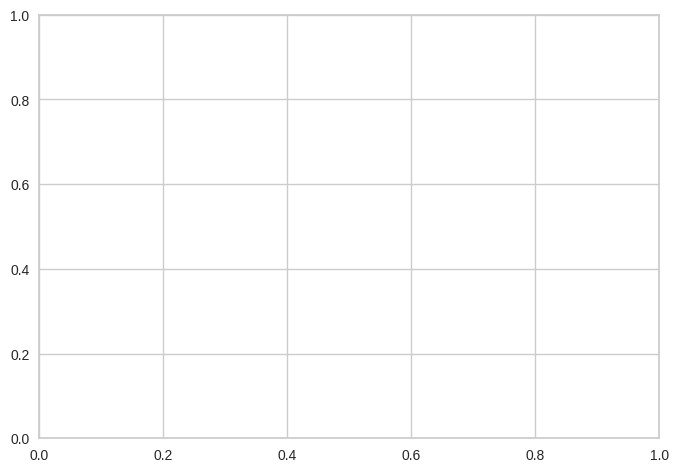

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
evaluate_model(tuned_rf)

## PDP

In [ ]:
X = pd.concat([X_train, y_train], axis = 1)

In [ ]:
X

,origin,dest,weekNum,gender,age,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,max_time,...,end_sin,end_cos,median_time,min_time,median_distance,max_transit_methods,max_distance,avg_last_walk,median_last_walk,modal
2446827,4,5,2.096216,False,-0.328491,5,5,0.052703,0.313308,-0.327555,...,-0.643623,1.240578,-0.977127,-0.985984,-0.359404,-0.510214,-0.345677,-0.689180,0.732892,2
2167428,4,5,-0.241643,True,0.405689,1,3,0.194617,0.095363,-0.327555,...,-0.907177,0.430268,-0.977127,-0.985984,-0.359404,-0.510214,-0.345677,-0.689180,0.732892,2
1131621,0,0,-1.020929,False,1.139870,4,4,-0.709027,-0.558471,0.209821,...,-0.643623,-0.380043,0.831098,0.977208,0.333242,1.072709,0.153111,0.311915,-0.521895,4
3630411,2,3,1.316930,True,1.139870,5,5,-0.762553,-1.118900,0.344591,...,-0.643623,-0.380043,-0.390023,-0.498415,-0.307285,-0.510214,0.344433,-0.998698,-1.238917,4
2138984,4,5,-1.020929,False,-1.796851,5,5,-0.437091,1.527571,-0.327555,...,-0.331000,-0.715684,-0.977127,-0.985984,-0.359404,-0.510214,-0.345677,-0.689180,0.732892,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2780590,4,5,0.537643,True,0.405689,4,0,-0.164132,0.313308,-0.327555,...,-0.643623,1.240578,-0.977127,-0.985984,-0.359404,-0.510214,-0.345677,-0.689180,0.732892,2
3012073,4,5,-1.020929,True,0.405689,3,0,-0.303132,0.126498,-0.327555,...,-0.643623,1.240578,-0.977127,-0.985984,-0.359404,-0.510214,-0.345677,-0.689180,0.732892,2
2630291,4,5,-0.241643,True,1.874050,5,5,1.805493,4.391986,-0.327555,...,-0.643623,1.240578,-0.977127,-0.985984,-0.359404,-0.510214,-0.345677,-0.689180,0.732892,2
3318778,2,2,-1.020929,True,0.405689,5,5,-0.307909,-0.776416,-0.344615,...,0.076418,-0.973231,-0.309598,-0.401547,-0.586184,-2.093136,-0.515940,2.821909,-1.238917,1


In [ ]:
modal_1 = X[X.modal == 1].drop(columns = 'modal')
modal_2 = X[X.modal == 2].drop(columns = 'modal')
modal_3 = X[X.modal == 3].drop(columns = 'modal')
modal_4 = X[X.modal == 4].drop(columns = 'modal')
modal_5 = X[X.modal == 5].drop(columns = 'modal')
modal_7 = X[X.modal == 7].drop(columns = 'modal')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_partial_dependence(model, X_train, features=[0, 1], target=0, ax=ax)

plt.show()

In [ ]:
model.classes_

array([1, 2, 3, 4, 5, 7])

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (21.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123629 files and direc

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
np.unique(y_train)

array([1, 2, 3, 4, 5, 7])

In [ ]:
display.axes_

array([[<Axes: xlabel='origin', ylabel='Partial dependence'>]],
      dtype=object)

In [ ]:
X_train.columns

Index(['origin', 'dest', 'weekNum', 'gender', 'age', 'origin_purpose',
       'dest_purpose', 'od_dist_avg', 'od_duration_avg', 'max_time',
       'num_transit_methods', 'predict_time', 'num_transfer', 'isFestival',
       'isWeekend', 'speed', 'start_sin', 'start_cos', 'end_sin', 'end_cos',
       'median_time', 'min_time', 'median_distance', 'max_transit_methods',
       'max_distance', 'avg_last_walk', 'median_last_walk'],
      dtype='object')

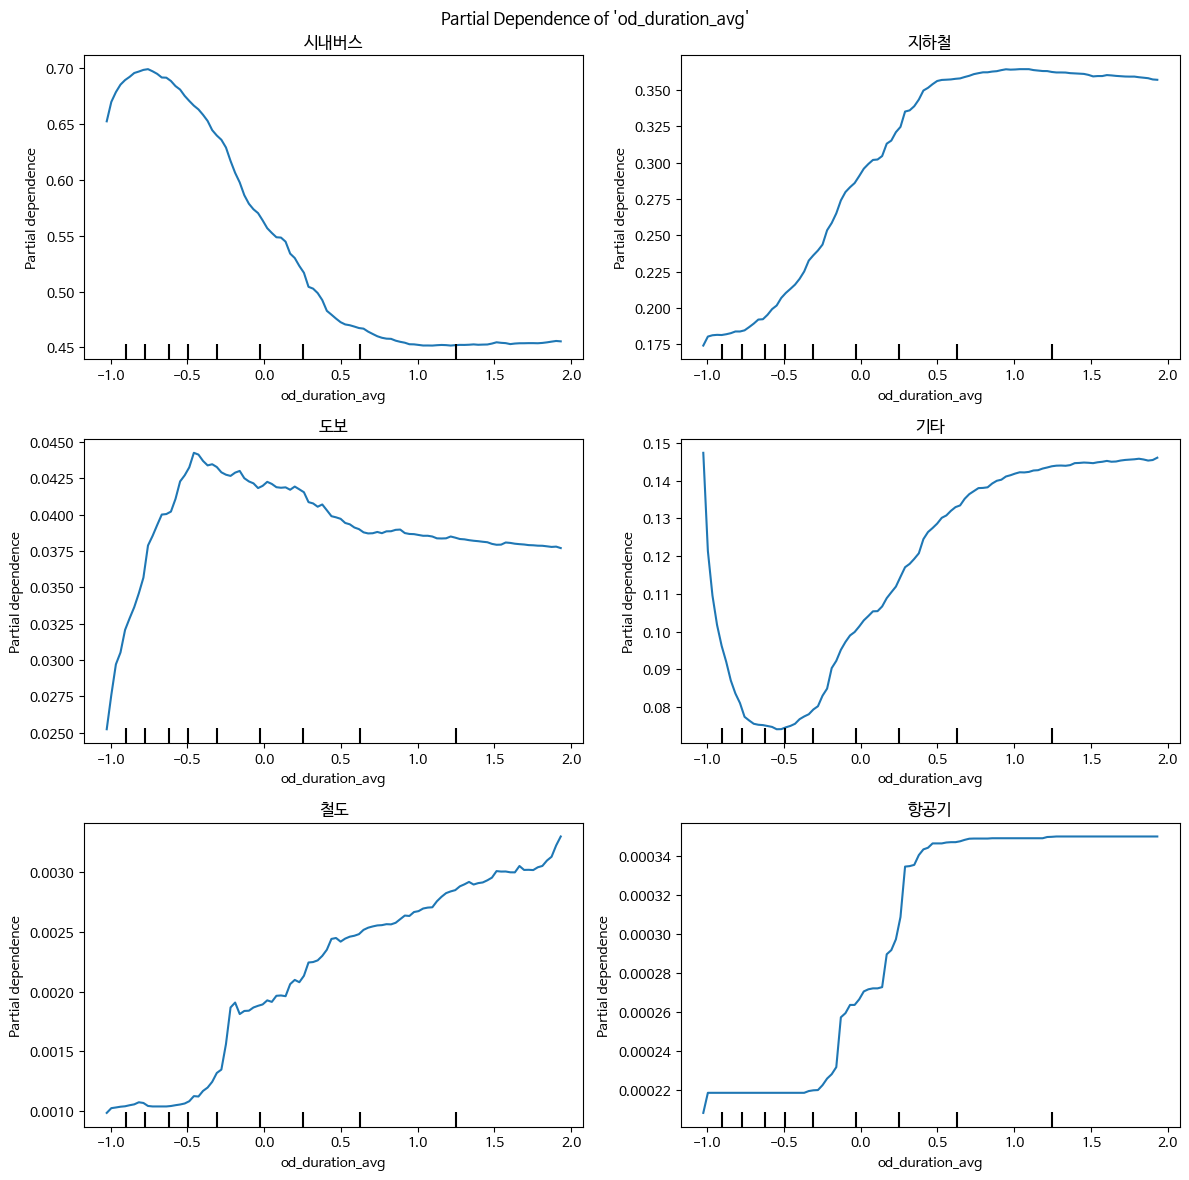

In [ ]:
classes = [1, 2, 3, 4, 5, 7]

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

# ticks = np.arange(0, 2)
# labels = ['주말', '평일']
targets = ['시내버스', '지하철', '도보', '기타', '철도', '항공기']

for idx, cls_index in enumerate(classes):
    display = PartialDependenceDisplay.from_estimator(
        model, X_train, features=['od_duration_avg'], response_method='predict_proba', target=cls_index, ax=axes[idx]
    )
    display.axes_[0][0].set_title(f"{targets[idx]}")
    # display.axes_[0][0].set_xticks(ticks)
    # display.axes_[0][0].set_xticklabels(labels)
    # axes[idx].tick_params(axis='x', which='both', labelsize=10)

fig.suptitle(f"Partial Dependence of 'od_duration_avg'")
plt.tight_layout()
plt.show()

In [ ]:
print(-2 * X_train['start_time'].std() + X_train['start_time'].mean())
print(-1 * X_train['start_time'].std() + X_train['start_time'].mean())
print(0 * X_train['start_time'].std() + X_train['start_time'].mean())
print(1 * X_train['start_time'].std() + X_train['start_time'].mean())
print(2 * X_train['start_time'].std() + X_train['start_time'].mean())

-2.000011440567612
-1.0000057202838062
-1.9216820091030407e-16
1.0000057202838057
2.000011440567612


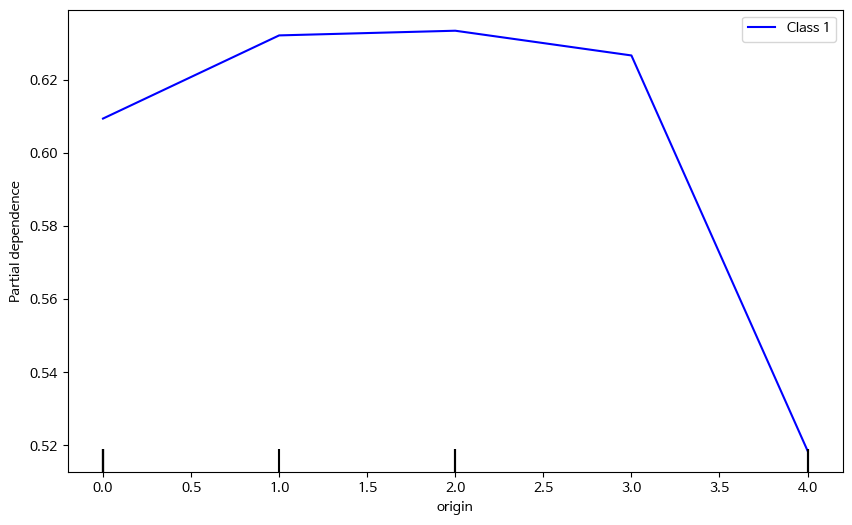

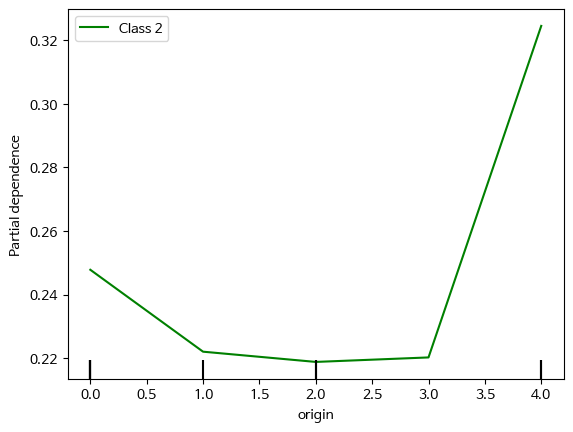

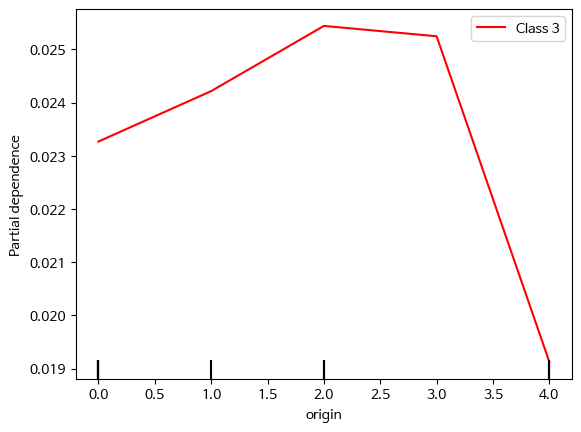

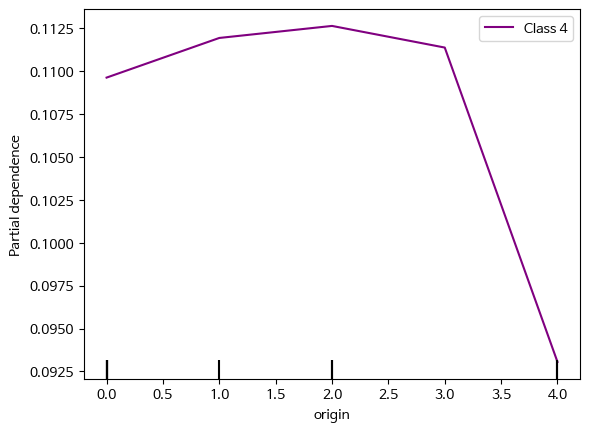

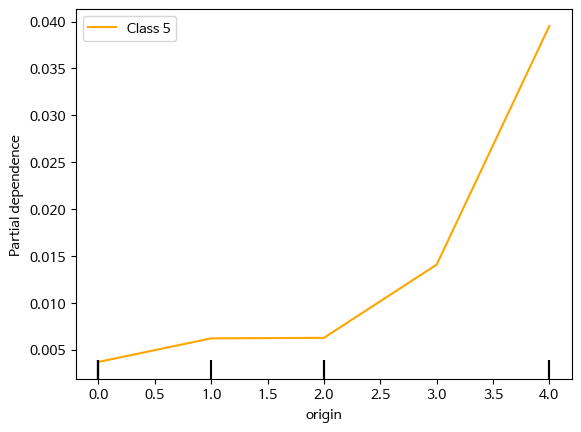

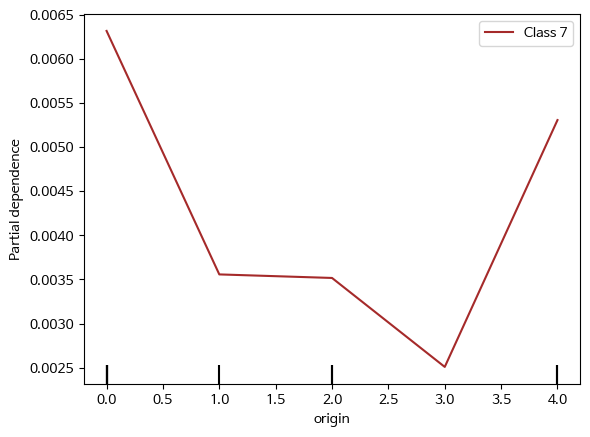

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# 여러 타겟 클래스에 대한 PDP을 그리기 위한 코드
fig, ax = plt.subplots(figsize=(10, 6))
idx = X_train.columns.get_loc('origin')

# # 각 클래스에 대해 추가적으로 PDP을 그리기
# for target_class in np.unique(y_train)[1:]:  # 첫 번째 클래스는 이미 그렸으므로 두 번째 클래스부터 반복
#     # `display`에서 `ax`를 가져와서 다른 클래스의 PDP을 그린다
#     display = PartialDependenceDisplay.from_estimator(
#         model, X_train, features=[idx], target=target_class
#     )
#     # 그려지는 PDP을 기존 ax에 덧붙이기
#     ax = display.axes_[0, 0]
#     display.plot(ax=ax, line_kw={'label': f'Class {target_class}'})

# 색상 목록을 정의 (각 클래스마다 다른 색상 사용)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

# 첫 번째 클래스에 대해 PDP을 그리기
display = PartialDependenceDisplay.from_estimator(
    model, X_train, features=[idx], target=np.unique(y_train)[0], ax=ax
)
# `line_kw`를 사용하여 첫 번째 클래스에 대한 색상과 레이블 설정
display.plot(ax=display.axes_[0, 0], line_kw={'label': f'Class {np.unique(y_train)[0]}', 'color': colors[0]})

# 두 번째 클래스부터 반복문을 돌면서 PDP을 추가로 그리기
for i, target_class in enumerate(np.unique(y_train)[1:], start=1):  # 두 번째 클래스부터 반복
    display = PartialDependenceDisplay.from_estimator(
        model, X_train, features=[idx], target=target_class
    )
    # `display.axes_`를 통해 `ax`를 가져와서 추가적인 클래스를 그리기
    display.plot(ax=display.axes_[0, 0], line_kw={'label': f'Class {target_class}', 'color': colors[i]})

# for i, target_class in enumerate(np.unique(y_train)):  # 각 클래스별로 반복
#     # `target_class`에 대한 PDP을 계산
#     display = PartialDependenceDisplay.from_estimator(
#         model, X_train, features=[idx], target=target_class
#     )

#     # 각 클래스에 대한 PDP을 `ax`에 겹쳐서 그리기
#     # `display.plot()`은 기본적으로 하나의 `ax`에 그려지므로, 같은 `ax`를 재사용
#     display.plot(ax=ax, line_kw={'label': f'Class {target_class}', 'color': colors[i]})

# 레전드 추가
ax.legend()

# 그래프 출력
plt.show()

In [ ]:
X_train.columns

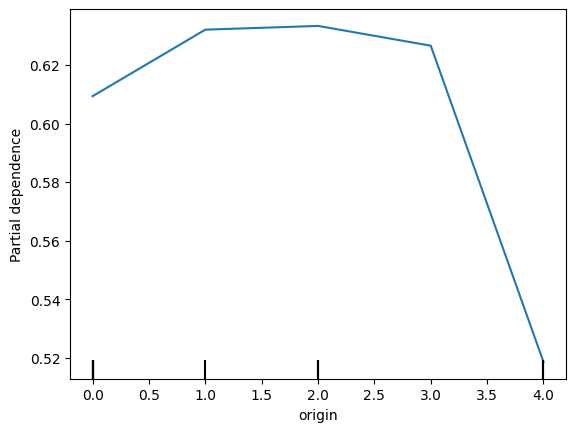

In [ ]:
pd_results = PartialDependenceDisplay.from_estimator(
            model, X_train, features=['origin'], response_method='predict_proba', target=1
        )
pd_results

In [ ]:
pd_results.features_[0]

AttributeError: 'PartialDependenceDisplay' object has no attribute 'features_'

In [ ]:
pip install --upgrade pip


In [ ]:
pip install --upgrade scikit-learn


In [ ]:
pip install scikit-learn==1.4.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 35.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.3.2 requires scikit-learn>1.4.0, but you have scikit-learn 1.4.0 which is incompatible.


In [ ]:
from sklearn.inspection import plot_partial_dependence

ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (/usr/local/lib/python3.10/dist-packages/sklearn/inspection/__init__.py)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt


# SHAP 값 계산
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Petal.Width에 대한 Partial Dependence Plot
feature = 'origin'
feature_index = X.columns.get_loc(feature)
target_classes = [1, 2, 3, 4, 5, 7]

# 모든 클래스에 대해 PDP 그리기
plt.figure(figsize=(12, 8))
for target_class in target_classes:
  shap.dependence_plot(ind=feature_index, shap_values=shap_values[target_class - 1],
                       features=['origin'], interaction_index=None, show=False, alpha=0.5,
                       color=plt.cm.viridis(target_class / max(target_classes)))
  plt.plot([], [], label=f'Class {target_class}') # 범례 추가

plt.xlabel(feature)
plt.ylabel('Partial Dependence')
plt.title(f'Partial Dependence Plot for {feature} (All Classes)')
plt.legend()
plt.show()


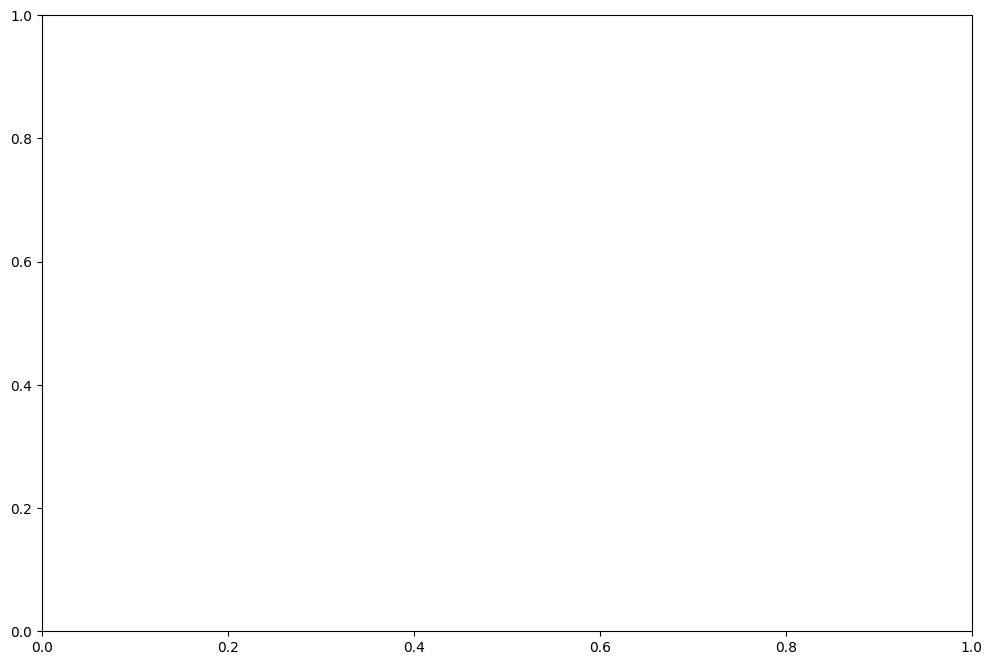

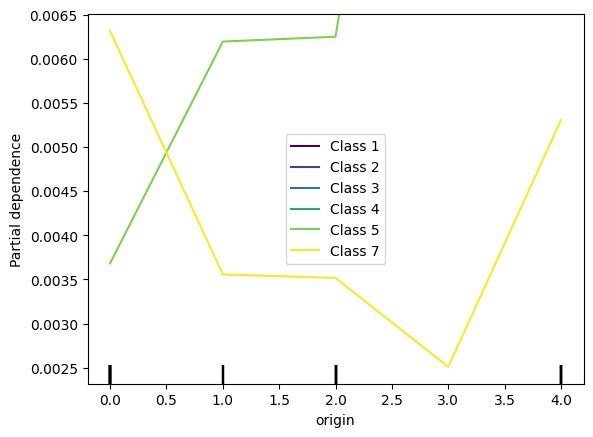

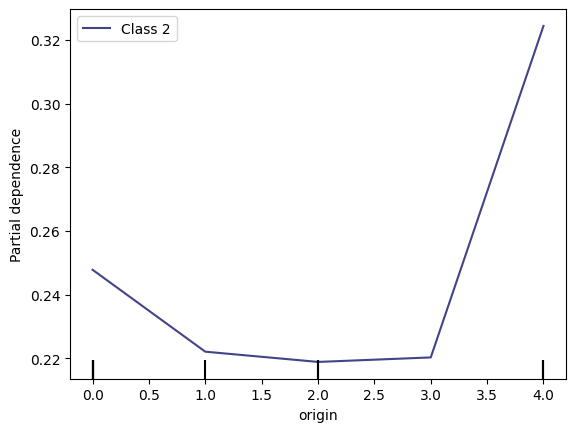

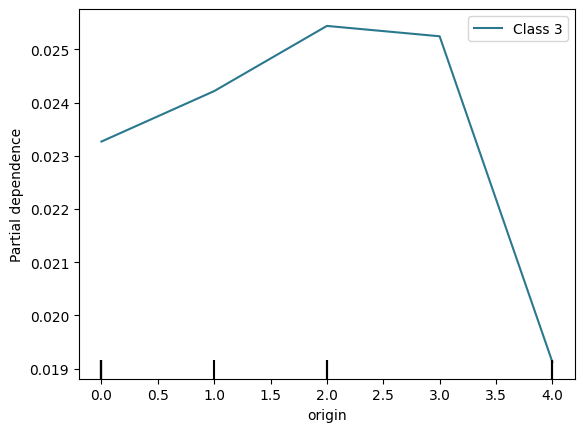

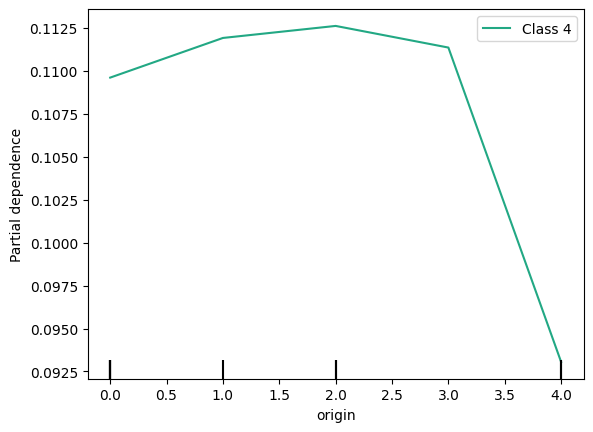

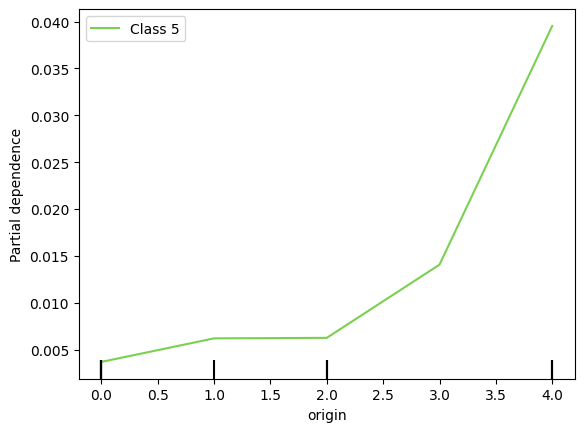

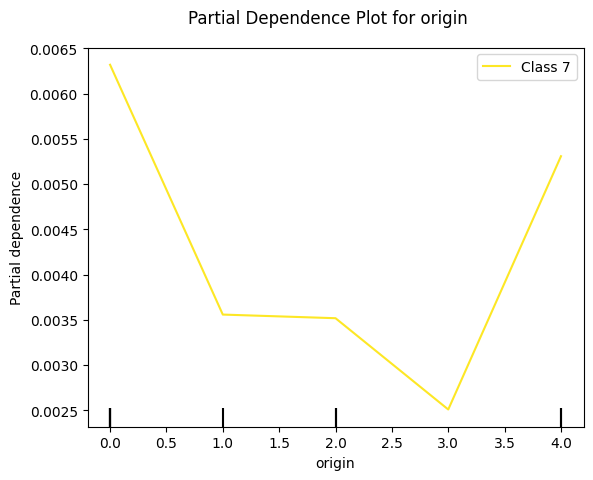

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
import matplotlib.pyplot as plt


# PDP를 그릴 변수 지정
feature = 'origin'

# 각 클래스에 대해 PDP 그리기
fig, ax = plt.subplots(figsize=(12, 8))

target_classes = [1, 2, 3, 4, 5, 7]
colors = plt.cm.viridis(np.linspace(0, 1, len(target_classes)))

# # 첫 번째 클래스를 그린 후 축 객체 저장
# fig, ax = plt.subplots(figsize=(12, 8))
# for i, target_class in enumerate(target_classes):
#   display = PartialDependenceDisplay.from_estimator( model, X_train, [feature],
#                                                     target=target_class, kind='average',
#                                                      line_kw={"label": f'Class {target_class}', "color": colors[i]} )
#   if i == 0:
#     base_ax = display.axes_
#   else:
#     display.plot(ax=base_ax)
for i, target_class in enumerate(target_classes):
  display = PartialDependenceDisplay.from_estimator( model, X_train, [feature],
                                                    target=target_class, kind='average',
                                                     line_kw={"label": f'Class {target_class}', "color": colors[i]} )
  if i == 0: base_ax = display.axes_
  else: display.plot(ax=base_ax, line_kw={"label": f'Class {target_class}', "color": colors[i]})
plt.suptitle(f'Partial Dependence Plot for {feature}')
plt.subplots_adjust(top=0.9)  # 제목과 그래프의 간격 조절
plt.legend()
plt.show()


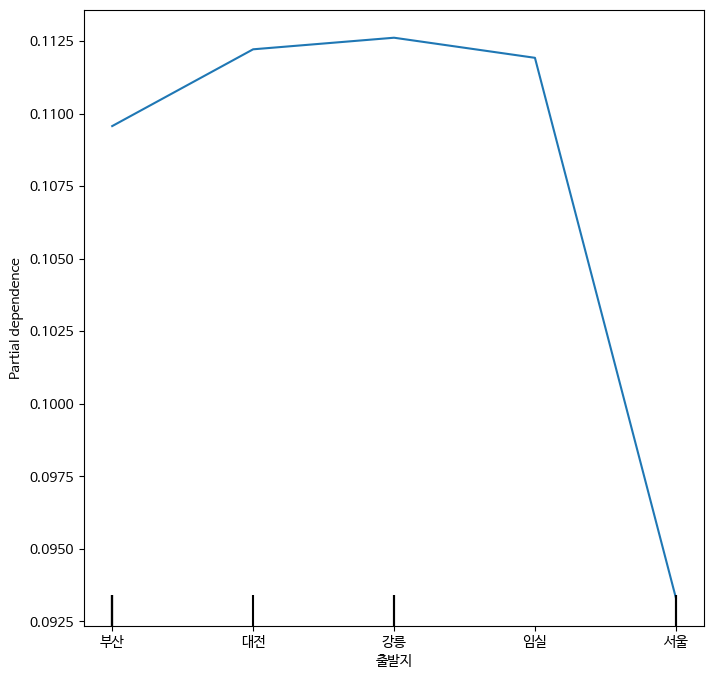

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence

fig = plt.figure(figsize=(8, 8))
fig.set_facecolor('white')
ax = fig.add_subplot()

idx = X_train.columns.get_loc('origin')
PartialDependenceDisplay.from_estimator(model, ## 학습 모델
                                        X_train, ## 의존도 계산시 필요한 데이터
                                        features = [idx],
                                        target = 4,
                                        response_method = 'predict_proba',
                                        grid_resolution = 50, ax = ax)

plt.xlabel('출발지')
ax.legend()
plt.xticks(ticks = np.arange(0, 5), labels = ['부산', '대전', '강릉', '임실', '서울'])
plt.show()

In [ ]:
y_train.unique()

[4, 1, 2, 3, 5, 7]
Categories (6, int64): [1, 2, 3, 4, 5, 7]

ValueError: x and y must have same first dimension, but have shapes (16,) and (1,)

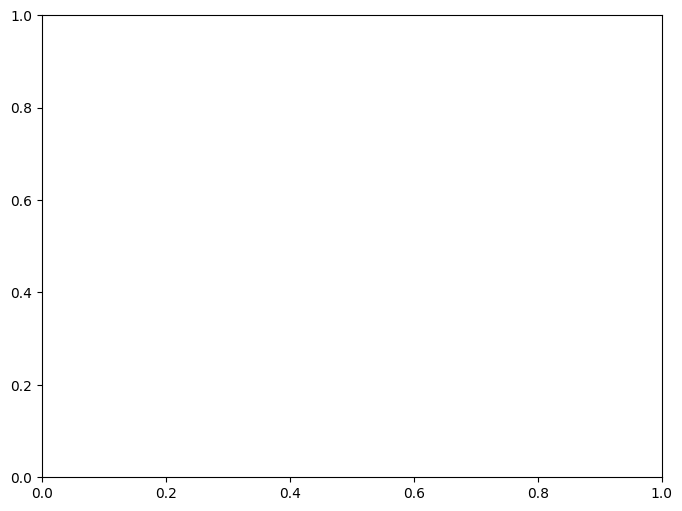

In [ ]:
grid_values = pdp_results['values'][0]
pdp_values = pdp_results['average'][0]

plt.figure(figsize = (8, 6))

for class_idx in range(1, len(y_train.unique()) + 1):
  plt.plot(grid_values, pdp_values[:, class_idx], label = f'class {class_idx}')
# plt.xlabel('Genre')
# plt.xticks(ticks = np.arange(0, 6), labels = ['POP', 'R&B/Soul', 'ETC', 'Rap/HipHop', 'Rock/Metal', 'Country'])
plt.show()

## 하이퍼파라미터 튜닝: optuna

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.6 MB/s eta 0:00:00


In [ ]:
import optuna

In [ ]:
def objective(trial):
    # 하이퍼파라미터 샘플링
    n_estimators = trial.suggest_int('n_estimators', 200, 300)  # 트리 개수
    max_depth = trial.suggest_int('max_depth', 15, 20, log=True)  # 최대 깊이
    min_samples_split = trial.suggest_int('min_samples_split', 10, 20)  # 내부 노드를 분할하기 위한 최소 샘플 수
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)  # 리프 노드에 있어야 할 최소 샘플 수
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    max_samples  = trial.suggest_float('max_samples', 0.8, 1.0)

    # 랜덤포레스트 모델 학습
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측 및 정확도 계산
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy  # 최적화 대상: 정확도


In [ ]:
# Optuna 최적화 실행
study = optuna.create_study(direction='maximize')  # 'maximize'는 정확도를 최대화
study.optimize(objective, n_trials=100)  # 50번의 실험 수행


[I 2024-11-13 02:24:13,873] A new study created in memory with name: no-name-3861724b-1ad7-433f-b6b2-5ae60fe87c9b
[I 2024-11-13 02:24:57,011] Trial 0 finished with value: 0.7826303325668394 and parameters: {'n_estimators': 278, 'max_depth': 18, 'min_samples_split': 17, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_samples': 0.8625082421296867}. Best is trial 0 with value: 0.7826303325668394.
[I 2024-11-13 02:25:34,721] Trial 1 finished with value: 0.7809829426502385 and parameters: {'n_estimators': 274, 'max_depth': 18, 'min_samples_split': 13, 'min_samples_leaf': 16, 'max_features': 'log2', 'max_samples': 0.9977676865722643}. Best is trial 0 with value: 0.7826303325668394.
[I 2024-11-13 02:26:04,273] Trial 2 finished with value: 0.7805024539245633 and parameters: {'n_estimators': 222, 'max_depth': 20, 'min_samples_split': 19, 'min_samples_leaf': 19, 'max_features': 'log2', 'max_samples': 0.955236426050354}. Best is trial 0 with value: 0.7826303325668394.
[I 2024-11-13 02:26:37,

In [ ]:
# 최적 하이퍼파라미터로 모델 학습
best_model = RandomForestClassifier(**study.best_params, random_state=42)
best_model.fit(X_train, y_train)

# 최종 성능 평가
y_pred_final = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Final Model Accuracy: {final_accuracy:.4f}")

Final Model Accuracy: 0.7844


In [ ]:
# 최적 하이퍼파라미터 출력
print("Best hyperparameters:", study.best_params)
print("Best accuracy:", study.best_value)


Best hyperparameters: {'n_estimators': 204, 'max_depth': 19, 'min_samples_split': 14, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.9754199026701483}
Best accuracy: 0.7853245014929471


In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
pip install optuna scikit-learn


## shap value

In [ ]:
data = data[data.modal == 0]

In [ ]:
X_data = data[['od_dist_avg', 'od_duration_avg']]
y_data = data.speed

In [ ]:
X_data

,od_dist_avg,od_duration_avg
0,272315.0,285.0
21,262264.0,233.0
75,294463.0,172.0
84,158665.0,156.0
138,296818.0,221.0
...,...,...
3940968,12382.0,18.0
3940973,44245.0,78.0
3940978,177680.0,130.0
3940983,66479.0,67.0


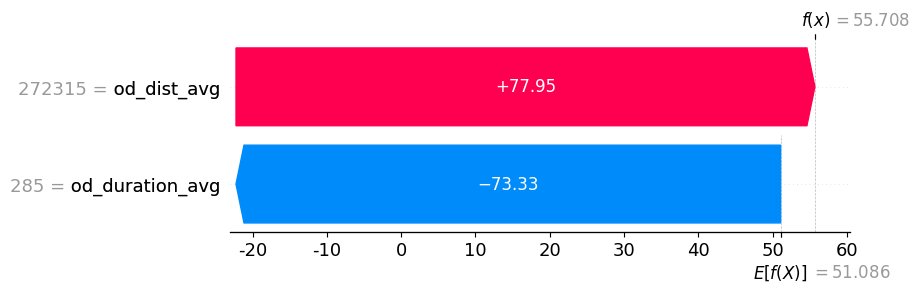

In [ ]:
import xgboost
import shap

model = xgboost.XGBRegressor().fit(X_data, y_data)

explainer = shap.TreeExplainer(model)
shap_values = explainer(X_data)

shap.plots.waterfall(shap_values[0])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams['axes.unicode_minus'] = False

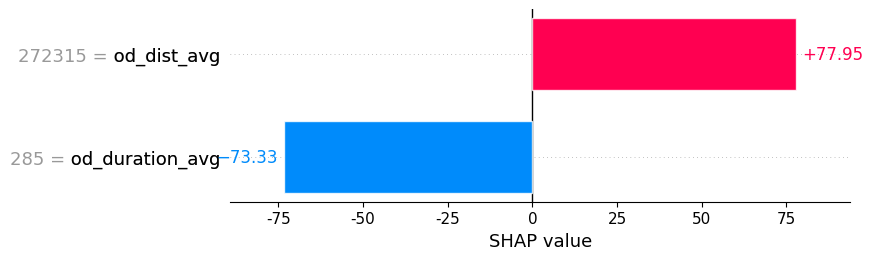

In [ ]:
shap.plots.bar(shap_values[0])

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0])